#**Network Slicing using Semisupervised Classification which is a Semi Supervised Learning Technique using Self-Training Method.**

In [1]:
# Random Seed for Under-sampling, Data-split and Modeling
import random
#Under-sampling
a = random.randint(10, 99)
# a = 65

# Data-split labelled and unlabelled
# b1 = random.randint(10, 99)
b1 = 42

#Data-split train and test
b2 = 42

#Data Modeling
# c = 42

#Data-split labelled and unlabelled
Z = 0.01

top_features_count = 50

In [2]:
a

91

In [3]:
b1

42

# **Data Pre-processing**

### **Import Libraries**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Dataset**

In [6]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
# data = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')
data = pd.read_csv('/content/drive/MyDrive/Dataset/5G_SliciNdd_preprocessed.csv')
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.000,URLLC
1,531568.0000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.000,URLLC
2,360399.0000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.000,URLLC
3,30702.0000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.000,URLLC
4,312747.0000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.000,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.3772,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,455262.0258,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,455286.2470,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,455211.1026,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


In [7]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.000,URLLC
1,531568.0000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.000,URLLC
2,360399.0000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.000,URLLC
3,30702.0000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.000,URLLC
4,312747.0000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.000,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.3772,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,455262.0258,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,455286.2470,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,455211.1026,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


In [8]:
data.columns.tolist()

['X',
 'Seq',
 'Dur',
 'RunTime',
 'Mean',
 'Sum',
 'Min',
 'Max',
 'Proto',
 'sTos',
 'dTos',
 'sDSb',
 'dDSb',
 'sTtl',
 'dTtl',
 'sHops',
 'dHops',
 'Cause',
 'TotPkts',
 'SrcPkts',
 'DstPkts',
 'TotBytes',
 'SrcBytes',
 'DstBytes',
 'Offset',
 'sMeanPktSz',
 'dMeanPktSz',
 'Load',
 'SrcLoad',
 'DstLoad',
 'Loss',
 'SrcLoss',
 'DstLoss',
 'pLoss',
 'SrcGap',
 'DstGap',
 'Rate',
 'SrcRate',
 'DstRate',
 'State',
 'SrcWin',
 'DstWin',
 'SrcTCPBase',
 'DstTCPBase',
 'TcpRtt',
 'SynAck',
 'AckDat',
 'UniqueID',
 'SliceType']

In [9]:
data = data.drop(data.columns[0], axis=1)
data

,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,dTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,184.000000,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.000,URLLC
1,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,0.257735,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.000,URLLC
2,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,0.257735,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.000,URLLC
3,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,0.000000,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.000,URLLC
4,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,0.257735,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.000,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


### **Class Distribution Analysis**

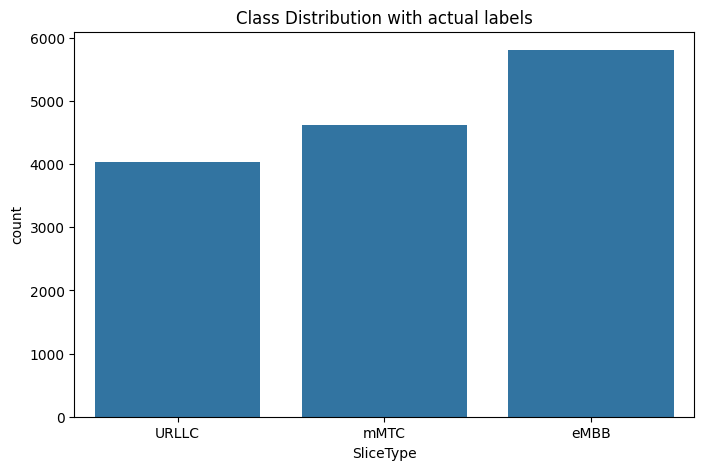

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['SliceType'])
plt.title('Class Distribution with actual labels')
plt.show()

#### Heatmaps

In [11]:
# # Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
# sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution)')
# plt.show()

### **Relevant Feature Selection**

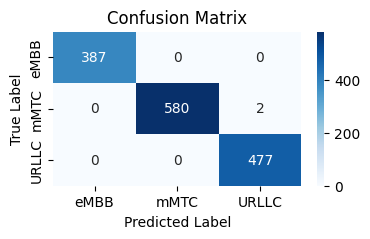

              precision    recall  f1-score   support

       URLLC     1.0000    1.0000    1.0000       387
        eMBB     1.0000    0.9966    0.9983       582
        mMTC     0.9958    1.0000    0.9979       477

    accuracy                         0.9986      1446
   macro avg     0.9986    0.9989    0.9987      1446
weighted avg     0.9986    0.9986    0.9986      1446



In [12]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('SliceType', axis=1)
y = data['SliceType']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
# y_pred

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, digits=4))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

In [13]:
top_features = feature_importance['feature'].head(top_features_count).tolist()
# top_features = feature_importance['feature'][start_index:end_index].tolist()
print(top_features)

['Loss', 'Rate', 'pLoss', 'Load', 'DstRate', 'DstLoad', 'SrcRate', 'SrcBytes', 'dMeanPktSz', 'SrcWin', 'DstBytes', 'TotBytes', 'SrcLoad', 'SrcPkts', 'dDSb', 'TotPkts', 'SrcLoss', 'Proto', 'Seq', 'DstWin', 'Min', 'DstLoss', 'Mean', 'Max', 'UniqueID', 'Dur', 'Sum', 'State', 'AckDat', 'RunTime', 'TcpRtt', 'DstPkts', 'SynAck', 'sMeanPktSz', 'dTtl', 'SrcTCPBase', 'dHops', 'sTtl', 'Offset', 'Cause', 'sHops', 'DstTCPBase', 'dTos', 'sDSb', 'sTos', 'DstGap', 'SrcGap']


In [14]:
print("\n Selecting top features")
X = X[top_features]
X.head()


 Selecting top features


,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
0,0.0,3460.207764,0.0,0.000000,0.000000,0.00000,0.000000,64.0,60.000000,64128.000,...,250,163876.0,1,6,3.704605e+09,184.000000,6,224,0,0
1,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,74.0,0.000000,1270506.667,...,249,1714024.0,1,7,2.446250e+09,0.257735,4,0,0,0
2,0.0,0.390587,0.0,131.237137,0.000000,0.00000,0.390587,84.0,0.000000,1270506.667,...,63,26304452.0,2,1,2.446250e+09,0.257735,4,0,0,0
3,0.0,108.662582,0.0,84843.742190,43.465034,23297.25781,43.465034,530.0,66.666664,56960.000,...,64,660484.0,2,0,3.508802e+09,0.000000,4,0,0,0
4,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,42.0,0.000000,1270506.667,...,63,22285688.0,1,1,2.446250e+09,0.257735,4,0,0,0


In [15]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
features = top_features
features

['Loss',
 'Rate',
 'pLoss',
 'Load',
 'DstRate',
 'DstLoad',
 'SrcRate',
 'SrcBytes',
 'dMeanPktSz',
 'SrcWin',
 'DstBytes',
 'TotBytes',
 'SrcLoad',
 'SrcPkts',
 'dDSb',
 'TotPkts',
 'SrcLoss',
 'Proto',
 'Seq',
 'DstWin',
 'Min',
 'DstLoss',
 'Mean',
 'Max',
 'UniqueID',
 'Dur',
 'Sum',
 'State',
 'AckDat',
 'RunTime',
 'TcpRtt',
 'DstPkts',
 'SynAck',
 'sMeanPktSz',
 'dTtl',
 'SrcTCPBase',
 'dHops',
 'sTtl',
 'Offset',
 'Cause',
 'sHops',
 'DstTCPBase',
 'dTos',
 'sDSb',
 'sTos',
 'DstGap',
 'SrcGap']

#### Heatmaps

In [16]:
# # Create a heatmap for the correlation matrix of all selected features
# plt.figure(figsize=(14, 8))
# sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution) with selected features')
# plt.show()

# **Data Split**

### **Define X and y**

In [17]:
X = data[features]
X

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
0,0.000000,3460.207764,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,60.000000,64128.000,...,250,1.638760e+05,1,6,3.704605e+09,184.000000,6,224,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,1270506.667,...,249,1.714024e+06,1,7,2.446250e+09,0.257735,4,0,0,0
2,0.000000,0.390587,0.000000,131.237137,0.000000,0.000000,0.390587,84.000000,0.000000,1270506.667,...,63,2.630445e+07,2,1,2.446250e+09,0.257735,4,0,0,0
3,0.000000,108.662582,0.000000,84843.742190,43.465034,23297.257810,43.465034,530.000000,66.666664,56960.000,...,64,6.604840e+05,2,0,3.508802e+09,0.000000,4,0,0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,1270506.667,...,63,2.228569e+07,1,1,2.446250e+09,0.257735,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2.000000,3.821267,10.105935,2415.138241,1.594339,901.270514,2.019412,895.921888,68.162787,64256.000,...,63,9.837076e+04,1,1,1.485176e+08,0.000000,4,0,0,0
14452,1.257694,3.722216,9.210293,2471.046868,1.400239,763.222253,2.029394,767.564275,67.734197,64256.000,...,63,8.742893e+04,1,1,1.485176e+08,0.000000,4,0,0,0
14453,2.000000,3.840632,10.360201,2283.097961,1.626468,855.459521,2.037339,910.348377,68.009158,64256.000,...,63,9.362468e+04,1,1,1.485176e+08,0.000000,4,0,0,0
14454,1.609694,3.244096,7.659634,2106.446226,1.408035,699.197109,1.797084,839.936962,67.815812,64256.000,...,63,7.425719e+04,1,1,1.485176e+08,0.000000,4,0,0,0


In [18]:
y = data['SliceType']
y

,SliceType
0,URLLC
1,URLLC
2,URLLC
3,URLLC
4,URLLC
...,...
14451,mMTC
14452,mMTC
14453,mMTC
14454,mMTC


### **t-SNE - Dimensionality Reduction**

In [ ]:
X_backup = X
X_backup

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,0,1,0,1
1,0.010000,100,0,1,0,1
2,0.010000,100,0,1,0,1
3,0.010000,100,0,1,0,1
4,0.010000,100,0,1,0,1
...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1
63163,0.000001,10,1,0,0,1
63164,0.000001,10,1,0,0,1
63165,0.000001,10,1,0,0,1


In [ ]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

array([[  13.224804 , -124.9993   ],
       [  13.224804 , -124.9993   ],
       [  13.224804 , -124.9993   ],
       ...,
       [-123.966156 ,   -2.3899918],
       [-123.966156 ,   -2.3899918],
       [-123.966156 ,   -2.3899918]], dtype=float32)

In [ ]:
X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
X

,Feature 1,Feature 2
0,13.224804,-124.999298
1,13.224804,-124.999298
2,13.224804,-124.999298
3,13.224804,-124.999298
4,13.224804,-124.999298
...,...,...
63162,-123.966156,-2.389992
63163,-123.966156,-2.389992
63164,-123.966156,-2.389992
63165,-123.966156,-2.389992


#### Pair Plots

In [ ]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [ ]:
data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
data

,Feature 1,Feature 2,slice Type
0,13.224804,-124.999298,eMBB
1,13.224804,-124.999298,eMBB
2,13.224804,-124.999298,eMBB
3,13.224804,-124.999298,eMBB
4,13.224804,-124.999298,eMBB
...,...,...,...
63162,-123.966156,-2.389992,URLLC
63163,-123.966156,-2.389992,URLLC
63164,-123.966156,-2.389992,URLLC
63165,-123.966156,-2.389992,URLLC


In [ ]:
features = ['Feature 1', 'Feature 2']

### **Define Unlabelled and Labelled Dataset**

In [19]:
print(b1)
print(Z)

42
0.01


In [20]:
# Split the dataset into training and testing sets
# X_labelled = X_train
# X_unlabelled = X_test
# y_labelled = y_train
# y_unlabelled = y_test

X_labelled, X_unlabelled, y_labelled, y_unlabelled = train_test_split(X,y, train_size=Z, random_state=b1)

In [21]:
X_labelled

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
14151,2.000000,5.574015,38.269067,5204.476168,1.663890,4157.286154,3.335939,221.172548,105.122450,1.677696e+07,...,63,3.567041e+06,2,1,1.974159e+09,0.000000,4,0,0,0
8392,1.000000,68.162937,4.273599,133501.940400,21.160717,279946.621600,20.106414,1135.607839,1203.709678,5.619200e+04,...,63,9.964128e+06,2,1,2.938787e+09,0.000000,4,0,0,0
6278,1.000000,40.957931,3.509454,269311.919900,27.935817,313927.687400,13.526555,3595.738856,1319.639209,5.696000e+04,...,63,1.977413e+06,2,1,4.232232e+09,0.000000,4,0,0,0
3099,0.000000,2.619232,0.000000,2018.555176,1.309616,1417.877808,1.091347,412.000000,135.285721,6.412800e+04,...,63,4.452148e+06,2,1,9.083155e+08,0.000000,4,0,0,0
6184,1.000000,55.695003,4.230592,253992.810900,22.907321,282867.234300,14.656538,5545.862363,1318.563930,5.696000e+04,...,63,1.247624e+06,1,1,4.232232e+09,0.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,1.000000,44.364562,0.556081,342301.958500,29.836329,326201.503400,5.482154,4671.828855,1356.633172,5.696000e+04,...,64,2.773116e+06,1,0,5.466176e+08,0.000000,4,0,0,0
13418,1.000000,4.223407,9.310396,4342.127966,2.151351,3252.759624,1.455812,329.918593,242.991987,1.677696e+07,...,63,3.847394e+06,2,1,3.086442e+09,0.000000,4,0,0,0
5390,1.000000,76.774407,5.443820,376826.536600,53.991845,446399.017900,27.727192,590.362162,1065.783469,5.696000e+04,...,63,1.044659e+06,1,1,4.232232e+09,0.000000,4,0,0,0
860,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,0.388583,84.000000,0.000000,1.270507e+06,...,63,2.708392e+07,2,1,2.446250e+09,0.257735,4,0,0,0


In [22]:
X_unlabelled

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
3146,0.000000,0.439606,0.000000,1.477076e+02,0.000000,0.000000,0.439606,84.000000,0.000000,1270506.667,...,63,1.166616e+06,1,1,2.446250e+09,0.257735,4,0,0,0
14090,1.000000,3.632123,5.716374,2.263857e+03,1.463701,784.969841,1.928375,900.339579,67.055171,64256.000,...,63,8.434606e+04,1,1,4.150003e+09,0.000000,4,0,0,0
13473,1.000000,3.721983,5.400960,2.541616e+03,1.422970,765.365530,1.994199,925.340938,67.135955,64256.000,...,63,7.207288e+04,1,1,3.128347e+08,0.000000,4,0,0,0
14074,1.000000,3.556572,6.086617,2.171078e+03,1.359428,738.147718,1.739120,807.662359,67.467081,64256.000,...,63,6.890143e+04,1,1,2.059269e+09,0.000000,4,0,0,0
13012,1.000000,4.217047,8.913024,4.715410e+03,2.809133,3911.683537,2.193221,328.985211,237.325137,64128.000,...,63,1.024678e+06,2,1,1.770455e+09,0.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,0.000000,0.388192,0.000000,1.304324e+02,0.000000,0.000000,0.388192,84.000000,0.000000,1270506.667,...,63,7.536016e+06,2,1,2.446250e+09,0.257735,4,0,0,0
12790,1.000000,3.354233,8.567415,2.273778e+03,1.258700,623.268764,1.862865,741.115142,67.778128,64256.000,...,63,8.595258e+04,1,1,7.974013e+08,0.000000,4,0,0,0
7215,1.343726,111.463370,0.444012,1.429514e+06,53.934240,750124.872900,77.827835,30098.270260,1439.584479,56448.000,...,64,9.837386e+05,1,0,4.232232e+09,0.000000,4,0,0,0
3104,0.000000,2.022781,0.000000,6.559204e+03,0.899014,5487.579102,0.899014,745.000000,763.000000,62848.000,...,63,1.379873e+07,1,1,1.492886e+09,0.000000,4,0,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_labelled, y_labelled, test_size=Z, random_state=b1)

In [24]:
X_train

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
8433,1.000000,68.124549,5.507073,361675.751500,35.376005,362581.773900,26.687824,605.662601,1217.400024,56448.000,...,63,1.042981e+07,2,1,4.388114e+08,0.000000,4,0,0,0
1899,0.000000,0.387724,0.000000,130.275375,0.000000,0.000000,0.387724,84.000000,0.000000,1270506.667,...,63,1.653532e+07,2,1,2.446250e+09,0.257735,4,0,0,0
7989,1.000000,30.156708,3.966987,129106.622400,13.729845,120416.190800,16.117850,1218.914110,1064.510998,56192.000,...,63,9.396458e+06,1,1,2.938787e+09,0.000000,4,0,0,0
6736,1.490616,24.489968,3.827909,70959.700740,16.025249,75473.133600,21.060433,3179.864233,434.525733,180.000,...,64,2.987525e+05,1,0,2.646975e+09,0.000000,4,0,0,0
4426,1.000000,29.683486,5.015017,261930.965500,27.739554,237564.514100,22.136622,623.156990,1108.170215,56448.000,...,64,9.159867e+05,1,0,1.223059e+09,0.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,5.636908,5.778710,15.920298,4281.408024,1.566124,2138.364332,3.903018,2373.500724,92.701863,69632.000,...,64,1.371345e+05,2,0,3.577412e+09,0.000000,4,0,0,0
7849,1.000000,33.389373,3.846154,136298.282000,15.271979,124796.265500,16.362093,1343.773647,1026.166626,56192.000,...,63,9.396909e+06,1,1,2.938787e+09,0.000000,4,0,0,0
5258,1.000000,38.842070,0.581682,273944.414700,20.191852,242422.864800,17.942712,10054.386290,1426.843729,56960.000,...,64,2.456245e+06,1,0,5.466176e+08,0.000000,4,0,0,0
3556,0.000000,3.079131,0.000000,1997.329468,1.282971,691.778015,1.539565,742.000000,67.333336,64256.000,...,63,4.837732e+06,1,1,1.376767e+09,0.000000,4,0,0,0


In [25]:
X_test

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
6420,1.000000,34.289581,0.583284,281239.6694,26.145630,330723.8096,9.763406,5206.547753,1425.504693,56960.0,...,64,2792317.714,2,0,5.466176e+08,0.0,4,0,0,0
5463,1.703443,84.512167,2.450297,475499.7569,45.905864,443231.3753,35.757731,4184.967164,1388.010303,56960.0,...,63,1079076.203,1,1,4.232232e+09,0.0,4,0,0,0


# **Data Modelling and Analysis**

## **Base Model Training**

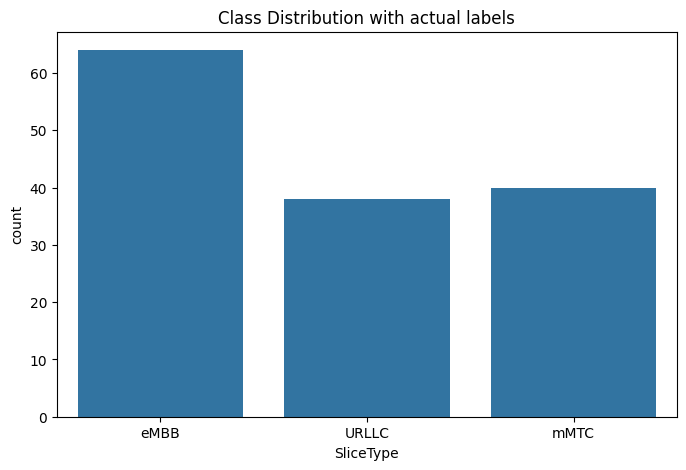

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train)
plt.title('Class Distribution with actual labels')
plt.show()

### **Under Sampling - Class Imbalance Issue**

In [29]:
print(a)

67


In [30]:
# Get the column names from the original DataFrame
X_labelled_column_names = X_labelled.columns.tolist()
X_labelled_column_names

['Loss',
 'Rate',
 'pLoss',
 'Load',
 'DstRate',
 'DstLoad',
 'SrcRate',
 'SrcBytes',
 'dMeanPktSz',
 'SrcWin',
 'DstBytes',
 'TotBytes',
 'SrcLoad',
 'SrcPkts',
 'dDSb',
 'TotPkts',
 'SrcLoss',
 'Proto',
 'Seq',
 'DstWin',
 'Min',
 'DstLoss',
 'Mean',
 'Max',
 'UniqueID',
 'Dur',
 'Sum',
 'State',
 'AckDat',
 'RunTime',
 'TcpRtt',
 'DstPkts',
 'SynAck',
 'sMeanPktSz',
 'dTtl',
 'SrcTCPBase',
 'dHops',
 'sTtl',
 'Offset',
 'Cause',
 'sHops',
 'DstTCPBase',
 'dTos',
 'sDSb',
 'sTos',
 'DstGap',
 'SrcGap']

In [31]:
# Convert X_unlabelled to a pandas DataFrame
X_labelled_df = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
X_labelled_with_labels = X_labelled_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_labelled_with_labels.reset_index(drop=True, inplace=True)
y_labelled.reset_index(drop=True, inplace=True)
y_labelled = pd.Series(y_labelled, name='SliceType')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_labelled_with_labels['SliceType'] = y_labelled

X_labelled_with_labels

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap,SliceType
0,1.041077,37.419465,3.998348,163536.912400,22.485596,119407.390400,18.603307,4851.609087,990.881687,1.800000e+02,...,6.162885e+05,1,0,2.646975e+09,0.000000,4,0,0,0,eMBB
1,0.000000,0.387769,0.000000,130.290329,0.000000,0.000000,0.387769,84.000000,0.000000,1.270507e+06,...,8.913244e+06,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC
2,2.000000,60.754183,3.700181,454038.502500,36.262113,393018.687900,31.574105,10409.426080,1360.604204,5.632000e+04,...,6.048447e+05,1,0,3.278420e+08,0.000000,4,0,0,0,eMBB
3,1.000000,50.540660,4.308849,286984.594600,28.780224,289348.840900,15.699722,1169.597795,1292.695075,5.619200e+04,...,1.047852e+07,2,1,2.938787e+09,0.000000,4,0,0,0,eMBB
4,1.000000,4.180601,10.000000,5300.489817,2.091926,4330.314278,1.568322,308.000000,258.799988,6.412800e+04,...,1.160108e+06,2,1,1.511629e+09,0.000000,4,0,0,0,mMTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,1.000000,44.364562,0.556081,342301.958500,29.836329,326201.503400,5.482154,4671.828855,1356.633172,5.696000e+04,...,2.773116e+06,1,0,5.466176e+08,0.000000,4,0,0,0,eMBB
1441,1.000000,4.223407,9.310396,4342.127966,2.151351,3252.759624,1.455812,329.918593,242.991987,1.677696e+07,...,3.847394e+06,2,1,3.086442e+09,0.000000,4,0,0,0,mMTC
1442,1.000000,76.774407,5.443820,376826.536600,53.991845,446399.017900,27.727192,590.362162,1065.783469,5.696000e+04,...,1.044659e+06,1,1,4.232232e+09,0.000000,4,0,0,0,eMBB
1443,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,0.388583,84.000000,0.000000,1.270507e+06,...,2.708392e+07,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC


In [32]:
# Identify the majority class
majority_class = X_labelled_with_labels['SliceType'].value_counts().idxmax()
print("Majority Class: ", majority_class)

# Count the number of data points in the majority class
majority_count = X_labelled_with_labels['SliceType'].value_counts()[majority_class]
print("Majority Class Count: ", majority_count)

# Count the number of data points in the other two classes
minority_count = X_labelled_with_labels['SliceType'].value_counts().min()
print("Minority Class Count: ", minority_count)

# Calculate the number of data points to remove from the majority class
num_to_remove = majority_count - minority_count
print("Amount of Data to be removed: ", num_to_remove)

# Randomly select data points from the majority class to remove
majority_indices = X_labelled_with_labels[X_labelled_with_labels['SliceType'] == majority_class].index
np.random.seed(a)
remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
print("Indices to be removed: \n", remove_indices[:100])

# Remove the selected data points from the DataFrame
balanced_data = X_labelled_with_labels.drop(remove_indices)

Majority Class:  eMBB
Majority Class Count:  595
Minority Class Count:  383
Amount of Data to be removed:  212
Indices to be removed: 
 [ 115  630 1265   98  828  349  444 1416  832  416  374  433 1339  725
  798  827   18  838  447  289  663 1345  684  852  448 1035  166 1308
  908  661 1052  499  206  174 1433 1432  494 1397 1124 1419  340 1040
  297  995  925  757  395 1403  813  669  169  449 1216 1427   63  647
  764  834  699  141  301  878  805   46  106   19   50 1004  712  446
  251  380  183  193  770  873  368  503 1223  489  918  472  671  677
  521  955  425  991 1034  496  576  303  153 1144  626 1169  567  572
  259  939]


In [33]:
balanced_data

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap,SliceType
1,0.000000,0.387769,0.000000,130.290329,0.000000,0.000000,0.387769,84.000000,0.000000,1.270507e+06,...,8.913244e+06,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC
2,2.000000,60.754183,3.700181,454038.502500,36.262113,393018.687900,31.574105,10409.426080,1360.604204,5.632000e+04,...,6.048447e+05,1,0,3.278420e+08,0.000000,4,0,0,0,eMBB
3,1.000000,50.540660,4.308849,286984.594600,28.780224,289348.840900,15.699722,1169.597795,1292.695075,5.619200e+04,...,1.047852e+07,2,1,2.938787e+09,0.000000,4,0,0,0,eMBB
4,1.000000,4.180601,10.000000,5300.489817,2.091926,4330.314278,1.568322,308.000000,258.799988,6.412800e+04,...,1.160108e+06,2,1,1.511629e+09,0.000000,4,0,0,0,mMTC
5,1.000000,3.292930,8.229258,3393.204984,1.656245,2827.995069,1.486189,339.675454,248.312057,6.412800e+04,...,6.456203e+06,2,1,2.619246e+09,0.000000,4,0,0,0,mMTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,1.000000,44.364562,0.556081,342301.958500,29.836329,326201.503400,5.482154,4671.828855,1356.633172,5.696000e+04,...,2.773116e+06,1,0,5.466176e+08,0.000000,4,0,0,0,eMBB
1441,1.000000,4.223407,9.310396,4342.127966,2.151351,3252.759624,1.455812,329.918593,242.991987,1.677696e+07,...,3.847394e+06,2,1,3.086442e+09,0.000000,4,0,0,0,mMTC
1442,1.000000,76.774407,5.443820,376826.536600,53.991845,446399.017900,27.727192,590.362162,1065.783469,5.696000e+04,...,1.044659e+06,1,1,4.232232e+09,0.000000,4,0,0,0,eMBB
1443,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,0.388583,84.000000,0.000000,1.270507e+06,...,2.708392e+07,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC


In [34]:
balanced_data = balanced_data.reset_index(drop=True)
balanced_data

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap,SliceType
0,0.000000,0.387769,0.000000,130.290329,0.000000,0.000000,0.387769,84.000000,0.000000,1.270507e+06,...,8.913244e+06,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC
1,2.000000,60.754183,3.700181,454038.502500,36.262113,393018.687900,31.574105,10409.426080,1360.604204,5.632000e+04,...,6.048447e+05,1,0,3.278420e+08,0.000000,4,0,0,0,eMBB
2,1.000000,50.540660,4.308849,286984.594600,28.780224,289348.840900,15.699722,1169.597795,1292.695075,5.619200e+04,...,1.047852e+07,2,1,2.938787e+09,0.000000,4,0,0,0,eMBB
3,1.000000,4.180601,10.000000,5300.489817,2.091926,4330.314278,1.568322,308.000000,258.799988,6.412800e+04,...,1.160108e+06,2,1,1.511629e+09,0.000000,4,0,0,0,mMTC
4,1.000000,3.292930,8.229258,3393.204984,1.656245,2827.995069,1.486189,339.675454,248.312057,6.412800e+04,...,6.456203e+06,2,1,2.619246e+09,0.000000,4,0,0,0,mMTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1.000000,44.364562,0.556081,342301.958500,29.836329,326201.503400,5.482154,4671.828855,1356.633172,5.696000e+04,...,2.773116e+06,1,0,5.466176e+08,0.000000,4,0,0,0,eMBB
1229,1.000000,4.223407,9.310396,4342.127966,2.151351,3252.759624,1.455812,329.918593,242.991987,1.677696e+07,...,3.847394e+06,2,1,3.086442e+09,0.000000,4,0,0,0,mMTC
1230,1.000000,76.774407,5.443820,376826.536600,53.991845,446399.017900,27.727192,590.362162,1065.783469,5.696000e+04,...,1.044659e+06,1,1,4.232232e+09,0.000000,4,0,0,0,eMBB
1231,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,0.388583,84.000000,0.000000,1.270507e+06,...,2.708392e+07,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC


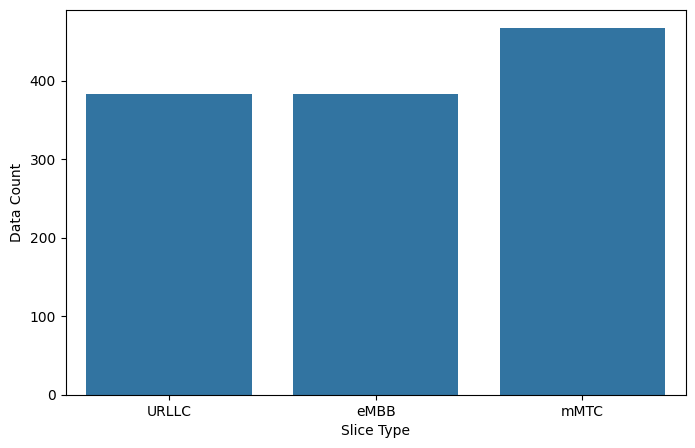

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(x=balanced_data['SliceType'])
# plt.title('Balanced Class Distribution with actual labels')
plt.xlabel('Slice Type')
plt.ylabel('Data Count')
plt.show()

In [37]:
X_labelled = balanced_data[features]
X_labelled

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
0,0.000000,0.387769,0.000000,130.290329,0.000000,0.000000,0.387769,84.000000,0.000000,1.270507e+06,...,63,8.913244e+06,2,1,2.446250e+09,0.257735,4,0,0,0
1,2.000000,60.754183,3.700181,454038.502500,36.262113,393018.687900,31.574105,10409.426080,1360.604204,5.632000e+04,...,64,6.048447e+05,1,0,3.278420e+08,0.000000,4,0,0,0
2,1.000000,50.540660,4.308849,286984.594600,28.780224,289348.840900,15.699722,1169.597795,1292.695075,5.619200e+04,...,63,1.047852e+07,2,1,2.938787e+09,0.000000,4,0,0,0
3,1.000000,4.180601,10.000000,5300.489817,2.091926,4330.314278,1.568322,308.000000,258.799988,6.412800e+04,...,63,1.160108e+06,2,1,1.511629e+09,0.000000,4,0,0,0
4,1.000000,3.292930,8.229258,3393.204984,1.656245,2827.995069,1.486189,339.675454,248.312057,6.412800e+04,...,63,6.456203e+06,2,1,2.619246e+09,0.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1.000000,44.364562,0.556081,342301.958500,29.836329,326201.503400,5.482154,4671.828855,1356.633172,5.696000e+04,...,64,2.773116e+06,1,0,5.466176e+08,0.000000,4,0,0,0
1229,1.000000,4.223407,9.310396,4342.127966,2.151351,3252.759624,1.455812,329.918593,242.991987,1.677696e+07,...,63,3.847394e+06,2,1,3.086442e+09,0.000000,4,0,0,0
1230,1.000000,76.774407,5.443820,376826.536600,53.991845,446399.017900,27.727192,590.362162,1065.783469,5.696000e+04,...,63,1.044659e+06,1,1,4.232232e+09,0.000000,4,0,0,0
1231,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,0.388583,84.000000,0.000000,1.270507e+06,...,63,2.708392e+07,2,1,2.446250e+09,0.257735,4,0,0,0


In [38]:
y_labelled = balanced_data['SliceType']
y_labelled

,SliceType
0,URLLC
1,eMBB
2,eMBB
3,mMTC
4,mMTC
...,...
1228,eMBB
1229,mMTC
1230,eMBB
1231,URLLC


### **Training**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model_RFC_base = RandomForestClassifier()
model_RFC_base.fit(X_train, y_train)

RandomForestClassifier()

## **Pseudo Label Creation**

In [29]:
y_pred_temp = model_RFC_base.predict(X_test)

In [30]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your target variable
label_encoder.fit(y)  # Fit on the original 'y' to get all labels

# Transform predictions to string labels
# y_pred = label_encoder.inverse_transform(y_pred_temp.astype(int))

# Transform predictions to numerical representations first
y_pred_numeric = label_encoder.transform(y_pred_temp)

# Then, transform the numerical representations back to string labels
y_pred = label_encoder.inverse_transform(y_pred_numeric)

In [31]:
accuracy_RFC = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy_RFC:.4f}")

precision_RFC = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision_RFC:.4f}")

recall_RFC = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall_RFC:.4f}")

f1score_RFC = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1score_RFC:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Parameters
confidence_threshold = 0.5  # Confidence threshold for pseudo-label selection
accuracies = []  # To store validation accuracies for plotting
iterations = []  # To track iteration numbers

# Initialize an empty list to store all pseudo-labels
all_pseudo_labels = []
all_confident_indices = []  # To store indices of confidently predicted samples


# Iterative self-training process
iteration = 0
while not X_unlabelled.empty:
    iteration += 1

    # Generate pseudo-labels with probabilities
    prob_predictions = model_RFC_base.predict_proba(X_unlabelled)

    # Print the probabilities for the first 5 samples (for debugging purposes)
    print(f"Iteration {iteration} - Predicted Probabilities (first 5 samples):")
    print(prob_predictions[:5])  # Show the probabilities for the first 5 samples
    print()

    # Identify the most confident predictions
    max_probs = np.max(prob_predictions, axis=1)
    confident_indices = np.where(max_probs >= confidence_threshold)[0]

    # If no confident predictions, stop the process
    if len(confident_indices) == 0:
        print(f"Stopping early at iteration {iteration}: No confident pseudo-labels.")
        break

    # Extract confident samples
    pseudo_labels = np.argmax(prob_predictions[confident_indices], axis=1)
    X_confident = X_unlabelled.iloc[confident_indices]

    # Ensure compatibility of pseudo-labels with y_labelled
    if y_labelled.dtype == 'object':
        y_labelled = pd.factorize(y_labelled)[0]
    pseudo_labels = pseudo_labels.astype(y_labelled.dtype)

    # Augment labelled dataset
    X_labelled = np.vstack((X_labelled, X_confident))
    y_labelled = np.hstack((y_labelled, pseudo_labels))

    # Remove newly labelled data from unlabelled set
    X_unlabelled = X_unlabelled.drop(X_unlabelled.index[confident_indices]).reset_index(drop=True)

    # Train a new classifier
    model_RFC_base = RandomForestClassifier(random_state=42)
    model_RFC_base.fit(X_labelled, y_labelled)

    # Evaluate the new classifier on the validation set (X_val, y_val)
    y_test_pred = model_RFC_base.predict(X_test)

    # Transform y_test_pred to string labels before calculating accuracy
    y_test_pred_str = label_encoder.inverse_transform(y_test_pred.astype(int))

    accuracy = accuracy_score(y_test, y_test_pred_str)

    # Store iteration and accuracy
    accuracies.append(accuracy)
    iterations.append(iteration)

    # Store pseudo-labels and confident indices
    all_pseudo_labels.extend(pseudo_labels)  # Extend the list with new pseudo-labels
    all_confident_indices.extend(confident_indices)  # Extend with indices

    print(f"Iteration {iteration}: Validation Accuracy = {accuracy:.4f}, Remaining unlabeled samples: {X_unlabelled.shape[0]}, Confident samples = {len(confident_indices)}")

print("Self-training complete.")

# # Plot the accuracy curve
# plt.figure(figsize=(10, 6))
# plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
# plt.xlabel("Iteration")
# plt.ylabel("Validation Accuracy")
# plt.title("Validation Accuracy Over Iterations")
# plt.grid()
# plt.show()

Iteration 1 - Predicted Probabilities (first 5 samples):
[[1.   0.   0.  ]
 [0.08 0.02 0.9 ]
 [0.1  0.01 0.89]
 [0.09 0.   0.91]
 [0.01 0.   0.99]]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Iteration 1: Validation Accuracy = 1.0000, Remaining unlabeled samples: 179, Confident samples = 14133
Iteration 2 - Predicted Probabilities (first 5 samples):
[[1.   0.   0.  ]
 [0.09 0.86 0.05]
 [0.13 0.37 0.5 ]
 [0.32 0.5  0.18]
 [0.15 0.34 0.51]]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Iteration 2: Validation Accuracy = 1.0000, Remaining unlabeled samples: 14, Confident samples = 165
Iteration 3 - Predicted Probabilities (first 5 samples):
[[0.   0.   1.  ]
 [0.26 0.34 0.4 ]
 [0.04 0.01 0.95]
 [0.04 0.   0.96]
 [0.25 0.58 0.17]]

Iteration 3: Validation Accuracy = 1.0000, Remaining unlabeled samples: 1, Confident samples = 13
Iteration 4 - Predicted Probabilities (first 5 samples):
[[0.26 0.36 0.38]]

Stopping early at iteration 4: No confident pseudo-labels.
Self-training complete.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


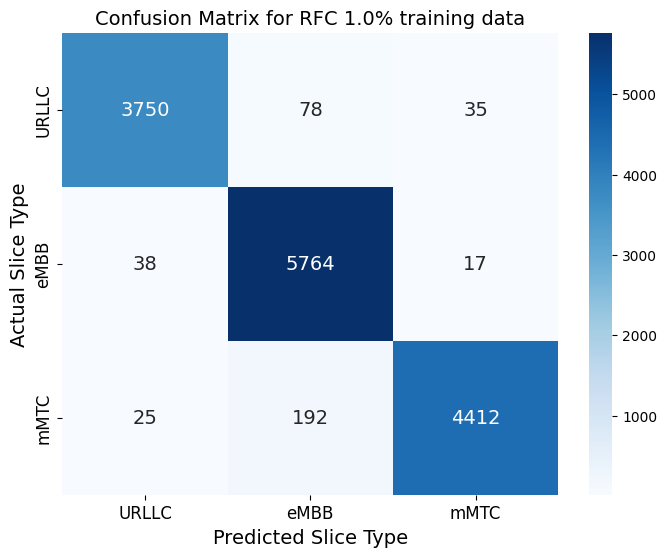

In [33]:
# Confusion Matrix
# Convert all accumulated pseudo-labels to string labels
all_pseudo_labels_str = label_encoder.inverse_transform(np.array(all_pseudo_labels).astype(int))

# Select the corresponding true labels from the original y_unlabelled
y_unlabelled_confident = y_unlabelled.iloc[all_confident_indices]

cm_RFC = confusion_matrix(y_unlabelled_confident, all_pseudo_labels_str)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y), annot_kws={"size": 14})
plt.title(f'Confusion Matrix for RFC {Z*100}% training data', fontsize=14)
plt.xlabel('Predicted Slice Type', fontsize=14)
plt.ylabel('Actual Slice Type', fontsize=14)

# Increase tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [34]:
accuracy_RFC = accuracy_score(y_unlabelled_confident, all_pseudo_labels_str)
print(f"Accuracy: {accuracy_RFC:.4f}")

precision_RFC = precision_score(y_unlabelled_confident, all_pseudo_labels_str, average='weighted')
print(f"Precision: {precision_RFC:.4f}")

recall_RFC = recall_score(y_unlabelled_confident, all_pseudo_labels_str, average='weighted')
print(f"Recall: {recall_RFC:.4f}")

f1score_RFC = f1_score(y_unlabelled_confident, all_pseudo_labels_str, average='weighted')
print(f"F1-score: {f1score_RFC:.4f}")

Accuracy: 0.9731
Precision: 0.9736
Recall: 0.9731
F1-score: 0.9731


## **New Dataset Creation**

In [ ]:
# # Get the column names from the original DataFrame
# X_unlabelled_column_names = X_unlabelled.columns.tolist()
# X_unlabelled_column_names

['Feature 1', 'Feature 2']

In [ ]:
# # Convert X_unlabelled to a pandas DataFrame
# X_unlabelled_df_RFC = pd.DataFrame(X_unlabelled, columns=X_unlabelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
# X_unlabelled_with_pseudo_labels_RFC = X_unlabelled_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_unlabelled_with_pseudo_labels_RFC.reset_index(drop=True, inplace=True)
# # pseudo_labels.reset_index(drop=True, inplace=True)
# pseudo_labels = pd.Series(pseudo_labels, name='slice Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_unlabelled_with_pseudo_labels_RFC['slice Type'] = pseudo_labels

# X_unlabelled_with_pseudo_labels_RFC

,Feature 1,Feature 2,slice Type
0,-123.966156,-2.389992,URLLC
1,-115.037819,-147.597336,mMTC
2,-123.966156,-2.389992,URLLC
3,132.817749,-111.010040,mMTC
4,-139.593002,141.917740,eMBB
...,...,...,...
56846,132.817749,-111.010040,mMTC
56847,-40.638390,193.148438,eMBB
56848,-123.966156,-2.389992,URLLC
56849,-123.966156,-2.389992,URLLC


In [ ]:
# # Get the column names from the original DataFrame
# X_labelled_column_names = X_labelled.columns.tolist()
# X_labelled_column_names

['Feature 1', 'Feature 2']

In [ ]:
# # Convert X_unlabelled to a pandas DataFrame
# X_labelled_df_RFC = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
# X_labelled_with_labels_RFC = X_labelled_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_labelled_with_labels_RFC.reset_index(drop=True, inplace=True)
# y_labelled.reset_index(drop=True, inplace=True)
# y_labelled = pd.Series(y_labelled, name='slice Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_labelled_with_labels_RFC['slice Type'] = y_labelled

# X_labelled_with_labels_RFC

,Feature 1,Feature 2,slice Type
0,11.780458,81.808334,eMBB
1,13.224804,-124.999298,eMBB
2,-123.966156,-2.389992,URLLC
3,-123.966156,-2.389992,URLLC
4,132.817749,-111.010040,mMTC
...,...,...,...
4438,-123.966156,-2.389992,URLLC
4439,-123.966156,-2.389992,URLLC
4440,-123.966156,-2.389992,URLLC
4441,13.224804,-124.999298,eMBB


In [ ]:
# data_new = pd.concat([X_labelled_with_labels_RFC, X_unlabelled_with_pseudo_labels_RFC], ignore_index=True)
# # data_new = data_new.dropna()
# data_new

,Feature 1,Feature 2,slice Type
0,11.780458,81.808334,eMBB
1,13.224804,-124.999298,eMBB
2,-123.966156,-2.389992,URLLC
3,-123.966156,-2.389992,URLLC
4,132.817749,-111.010040,mMTC
...,...,...,...
61289,132.817749,-111.010040,mMTC
61290,-40.638390,193.148438,eMBB
61291,-123.966156,-2.389992,URLLC
61292,-123.966156,-2.389992,URLLC


### **New Classifier Model Training**

In [ ]:
print(b2)

42


In [ ]:
X = data_new[features]
X

,Feature 1,Feature 2
0,11.780458,81.808334
1,13.224804,-124.999298
2,-123.966156,-2.389992
3,-123.966156,-2.389992
4,132.817749,-111.010040
...,...,...
61289,132.817749,-111.010040
61290,-40.638390,193.148438
61291,-123.966156,-2.389992
61292,-123.966156,-2.389992


In [ ]:
y = data_new['slice Type']
y

,slice Type
0,eMBB
1,eMBB
2,URLLC
3,URLLC
4,mMTC
...,...
61289,mMTC
61290,eMBB
61291,URLLC
61292,URLLC


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=b2)
X_train

,Feature 1,Feature 2
24727,206.162888,8.662295
56037,-123.966156,-2.389992
381,-123.966156,-2.389992
59569,-115.037819,-147.597336
34190,76.639557,189.082611
...,...,...
54343,-123.966156,-2.389992
38158,132.817749,-111.010040
860,132.817749,-111.010040
15795,11.780458,81.808334


In [ ]:
X_test

,Feature 1,Feature 2
27049,-11.040947,-217.018219
51957,206.162888,8.662295
50547,132.817749,-111.010040
30533,-40.638390,193.148438
42544,-123.966156,-2.389992
...,...,...
4244,-123.966156,-2.389992
16338,-139.593002,141.917740
51204,-139.593002,141.917740
16152,11.780458,81.808334


In [ ]:
model_RFC_new = RandomForestClassifier()
model_RFC_new.fit(X_train, y_train)

RandomForestClassifier()

# **Model Testing**

In [ ]:
# Predict the labels for the test data
y_pred = model_RFC_new.predict(X_test)
y_pred

NameError: name 'X_test' is not defined

## **Update testing dataset with labels**

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [ ]:
# Display the Updated Table
X_test_with_labels[:20]

,Feature 1,Feature 2,actual_label,predicted_label
0,-11.040947,-217.018219,mMTC,mMTC
1,206.162888,8.662295,eMBB,eMBB
2,132.817749,-111.010040,mMTC,mMTC
3,-40.638390,193.148438,eMBB,eMBB
4,-123.966156,-2.389992,URLLC,URLLC
5,-11.040947,-217.018219,mMTC,mMTC
6,-123.966156,-2.389992,URLLC,URLLC
7,-139.593002,141.917740,eMBB,eMBB
8,-123.966156,-2.389992,URLLC,URLLC
9,132.817749,-111.010040,mMTC,mMTC


## **Predicted Label Analysis**

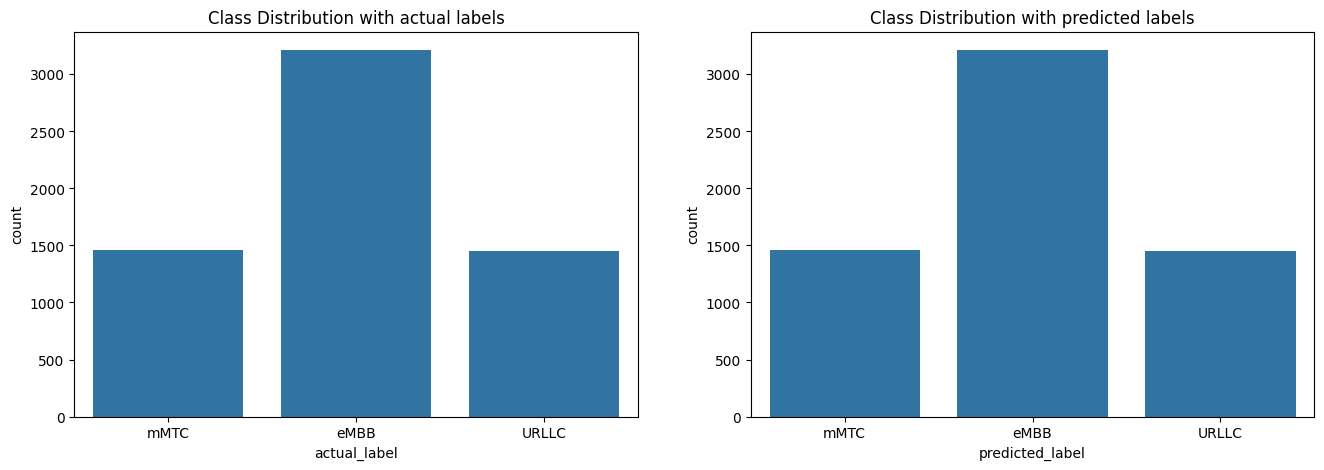

In [ ]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

### **Confusion Matrix**

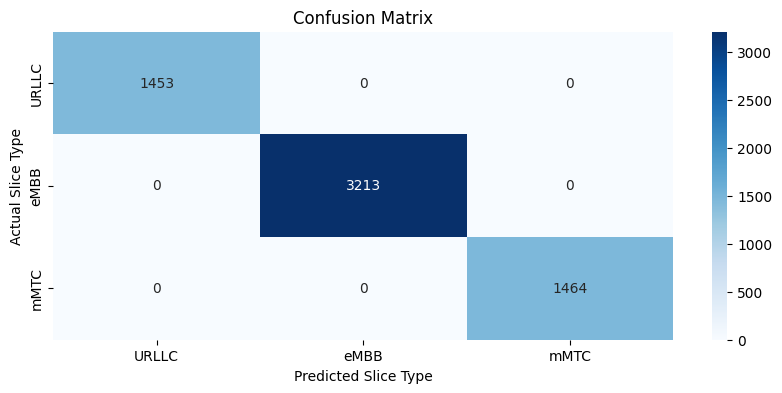

In [ ]:
# Confusion Matrix
plt.figure(figsize=(10, 4))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()
# print("\n", a, b, c)

In [ ]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 1.0
Precision 1.0
Recall 1.0
F1-score 1.0


In [ ]:
# Calculate the Silhouette Score
silhouette_score_test = silhouette_score(X_test, predicted_label)

# Print or use the Silhouette Score for evaluation
print("Silhouette Score:", silhouette_score_test)

Silhouette Score: 0.38129216


In [ ]:
# Calculate Davies-Bouldin Index
db_index_test = metrics.davies_bouldin_score(X_test, predicted_label)

# Print or use the DBI for evaluation
print("Davies-Bouldin Index for Testing(Labelled) Data:", db_index_test)

Davies-Bouldin Index for Testing(Labelled) Data: 0.9552817410977821


In [ ]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ar_index_test = adjusted_rand_score(actual_label, predicted_label)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ar_index_test)

Adjusted Rand Index for Testing(Labelled) Data: 1.0


# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp24- NSI_SSL_undersampling_tsne_5GSliceNdd.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'